In [1]:
import pydub
import scipy.io.wavfile

In [2]:
import io
stream = io.BytesIO()
audio_segment = pydub.AudioSegment.from_mp3('/home/dante_gates/music/Music/Miles Davis/Birth of The Cool/01 Move.mp3')
audio_segment.export(stream, 'wav')
stream.seek(0)
sr, audio = scipy.io.wavfile.read(stream)

In [3]:
print(sr)
print(audio.dtype)
len(audio.shape)

44100
int16


2

In [4]:
audio[:1000]

array([[ 0,  0],
       [-1,  0],
       [ 0,  0],
       ..., 
       [ 0,  0],
       [ 0,  0],
       [ 0,  0]], dtype=int16)

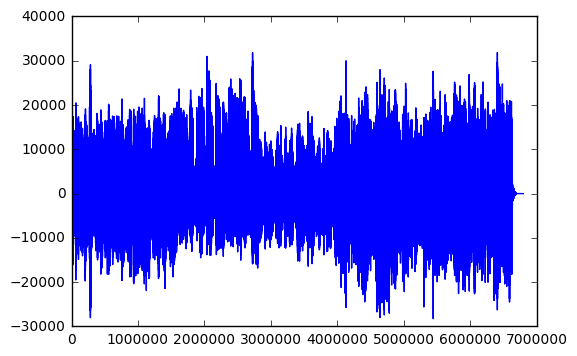

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(audio[:, 0])

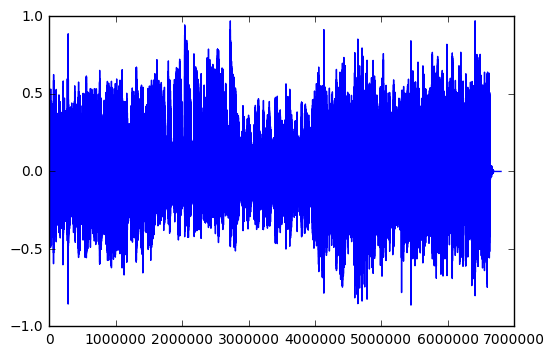

In [6]:
plt.plot(audio[:, 0] / 2**15)

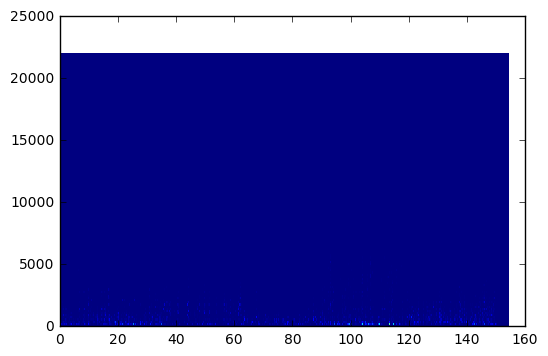

In [7]:
import scipy.signal
f, t, Sxx = scipy.signal.spectrogram(audio[:, 0], sr)
plt.pcolormesh(t, f, Sxx)

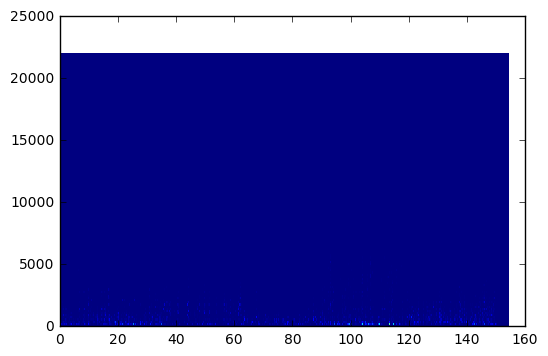

In [8]:
f, t, Sxx = scipy.signal.spectrogram(audio[:, 0] / 2**15, sr)
plt.pcolormesh(t, f, Sxx)

In [9]:
*_, Sxx1 = scipy.signal.spectrogram(audio[:, 0], sr)
*_, Sxx2 = scipy.signal.spectrogram(audio[:, 0] / 2**15, sr)
(Sxx1 == Sxx2).all()

False

In [10]:
newdata = audio.sum(axis=1) / 2
newdata = newdata.astype('int16')

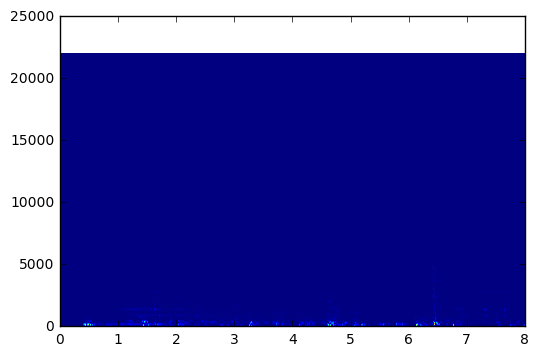

In [36]:
f, t, Sxx = scipy.signal.spectrogram(newdata[:8*sr], sr, nfft=2**14)
plt.pcolormesh(t, f, Sxx)

In [37]:
print('f', f.shape)
print('t', t.shape)
print('Sxx', Sxx.shape)
print('Sxx', Sxx.dtype)
Sxx

f (8193,)
t (1574,)
Sxx (8193, 1574)
Sxx float32


array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.24428797e+01,   4.37959442e+01,   6.13725471e+01],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.15516357e+02,   2.05157761e+02,   2.42897095e+02],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          3.87012024e+02,   5.57395386e+02,   6.02856384e+02],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          3.22594701e-06,   1.68185034e-06,   1.54572444e-05],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          3.20509366e-06,   1.68559518e-06,   1.54829740e-05],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.59906767e-06,   8.43421788e-07,   7.74577893e-06]], dtype=float32)

In [38]:
t

array([  2.90249433e-03,   7.98185941e-03,   1.30612245e-02, ...,
         7.98258503e+00,   7.98766440e+00,   7.99274376e+00])

In [34]:
f

array([  0.00000000e+00,   2.69165039e+00,   5.38330078e+00, ...,
         2.20446167e+04,   2.20473083e+04,   2.20500000e+04])

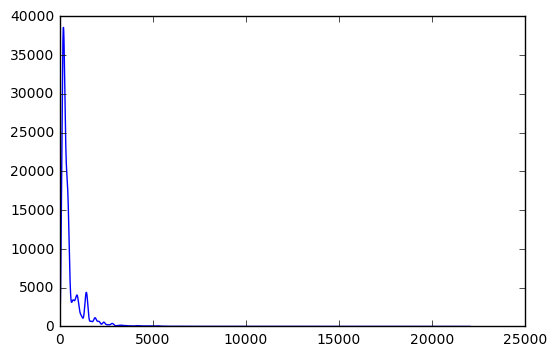

In [35]:
import numpy as np
plt.plot(f, np.mean(Sxx, axis=1))